Looking at the rolling 10 period average log returns on doge and shib as a rough 'fair value'. Simply be long shib short doge if dog has moved up more in the rolling prior 10m period and reverse if the opposite is true:


In [13]:
#libraries
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib.dates as mdates
style.use ('ggplot')
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv('DOGESHIBSPREAD.csv', parse_dates = True, index_col=0)

#visualise data as a check
df.shape

C:\Users\asus\AppData\Local\Temp\ipykernel_7528\2934084854.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('DOGESHIBSPREAD.csv', parse_dates = True, index_col=0)


(2456, 4)

In [14]:
#Calculate og returns over the previous time period
df['DOGELOG1'] = np.log(df['DOGECLOSE'] / df['DOGECLOSE'].shift(1))
df['SHIBLOG1'] = np.log(df['SHIBCLOSE'] / df['SHIBCLOSE'].shift(1))

#Calculate log return of the past 10 time periods
df['DOGELOG10'] = np.log(df['DOGECLOSE'] / df['DOGECLOSE'].shift(10))
df['SHIBLOG10'] = np.log(df['SHIBCLOSE'] / df['SHIBCLOSE'].shift(10))

#Compare the difference in the delta movement in Doge and Shib
df['DIF1'] = df['DOGELOG1'] - df['SHIBLOG1']
df['DIF10'] = df['DOGELOG10'] - df['SHIBLOG10']

#Drop the first 10 rows with na's which screw up loops
df.dropna(inplace=True)
df.head()

,DOGEOPEN,DOGECLOSE,SHIBOPEN,SHIBCLOSE,DOGELOG1,SHIBLOG1,DOGELOG10,SHIBLOG10,DIF1,DIF10
time,,,,,,,,,,
1686420600,0.06166,0.06165,0.006734,0.006771,-0.000324,0.005479,0.006183,0.009199,-0.005804,-0.003016
1686420900,0.06164,0.06155,0.006770,0.006747,-0.001623,-0.003551,0.005049,0.007140,0.001927,-0.002090
1686421200,0.06155,0.06041,0.006747,0.006654,-0.018695,-0.013880,-0.025657,-0.017135,-0.004815,-0.008522
1686421500,0.06041,0.06083,0.006653,0.006675,0.006928,0.003151,-0.020180,-0.012506,0.003777,-0.007674
1686421800,0.06083,0.06126,0.006674,0.006746,0.007044,0.010581,-0.018919,-0.012082,-0.003537,-0.006837


In [15]:
#Cointegration of close prices

import statsmodels.tsa.stattools as ts




x1=df['DOGECLOSE']


y1=df['SHIBCLOSE']


coin_result = ts.coint(x1, y1) 

coin_result

(-3.709146173105958,
 0.017835138923527574,
 array([-3.90092491, -3.33863016, -3.0461851 ]))

In [16]:
#Cointegration of log returns

import statsmodels.tsa.stattools as ts




x1=df['DOGELOG1']


y1=df['SHIBLOG1']


coin_result = ts.coint(x1, y1) 

coin_result

(-18.291893355348858,
 1.5489258580036254e-29,
 array([-3.90092491, -3.33863016, -3.0461851 ]))

<Axes: xlabel='time'>

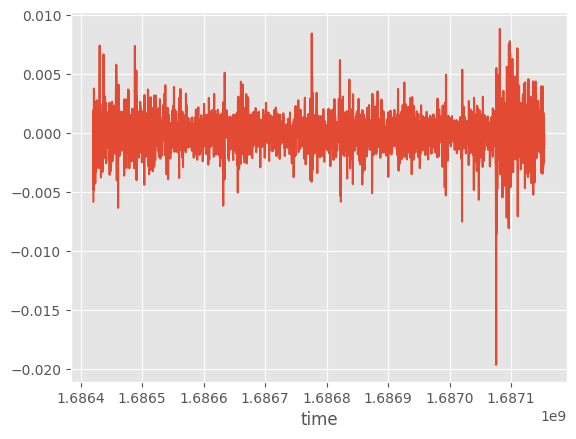

In [17]:
#Plot 1 period differences in returns - looks centered around 0 with tails
df['DIF1'].plot()

<Axes: xlabel='time'>

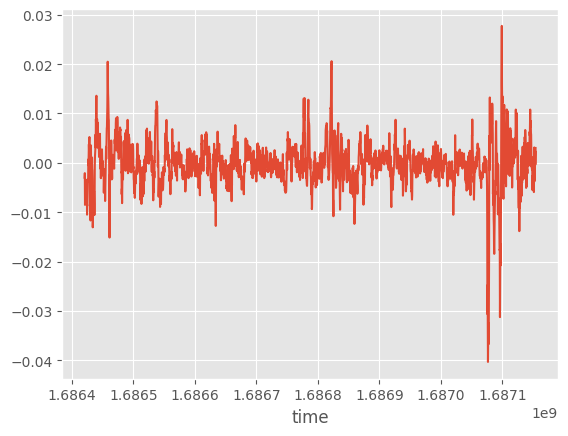

In [18]:
#Plot  10 period difference - looks centered around 0 with tails
df['DIF10'].plot()

#Make a really basic strategy that gets long doge and short shib when doge is up less than shib in the prior 10 periods and vice versa ignoring trading costs at this time


In [19]:

#Make 2 positions

df['DOGEPosition'] = None
#Fill our newly created position column - we will buy (1) for an upper band break and go to 0 on a lower band break
        
for row in range(len(df)):
   
    if (df['DIF10'].iloc[row] > 0) :
        df['DOGEPosition'].iloc[row] = -1    
        
    if (df['DIF10'].iloc[row] < 0):
        df['DOGEPosition'].iloc[row] = 1
        
        

#Forward fill our position column to replace the "None" values with the correct long/short positions to represent the "holding" of our position
#forward through time
df['DOGEPosition'].fillna(method='ffill',inplace=True)

df.head()

,DOGEOPEN,DOGECLOSE,SHIBOPEN,SHIBCLOSE,DOGELOG1,SHIBLOG1,DOGELOG10,SHIBLOG10,DIF1,DIF10,DOGEPosition
time,,,,,,,,,,,
1686420600,0.06166,0.06165,0.006734,0.006771,-0.000324,0.005479,0.006183,0.009199,-0.005804,-0.003016,1
1686420900,0.06164,0.06155,0.006770,0.006747,-0.001623,-0.003551,0.005049,0.007140,0.001927,-0.002090,1
1686421200,0.06155,0.06041,0.006747,0.006654,-0.018695,-0.013880,-0.025657,-0.017135,-0.004815,-0.008522,1
1686421500,0.06041,0.06083,0.006653,0.006675,0.006928,0.003151,-0.020180,-0.012506,0.003777,-0.007674,1
1686421800,0.06083,0.06126,0.006674,0.006746,0.007044,0.010581,-0.018919,-0.012082,-0.003537,-0.006837,1


In [20]:
df['SHIBPosition'] = None
#Fill our newly created position column - we will buy (1) for an upper band break and go to 0 on a lower band break
        
for row in range(len(df)):
   
    if (df['DIF10'].iloc[row] < 0) :
        df['SHIBPosition'].iloc[row] = -1    
        
    if (df['DIF10'].iloc[row] > 0):
        df['SHIBPosition'].iloc[row] = 1
        
        

#Forward fill our position column to replace the "None" values with the correct long/short positions to represent the "holding" of our position
#forward through time
df['SHIBPosition'].fillna(method='ffill',inplace=True)

df.head()

,DOGEOPEN,DOGECLOSE,SHIBOPEN,SHIBCLOSE,DOGELOG1,SHIBLOG1,DOGELOG10,SHIBLOG10,DIF1,DIF10,DOGEPosition,SHIBPosition
time,,,,,,,,,,,,
1686420600,0.06166,0.06165,0.006734,0.006771,-0.000324,0.005479,0.006183,0.009199,-0.005804,-0.003016,1,-1
1686420900,0.06164,0.06155,0.006770,0.006747,-0.001623,-0.003551,0.005049,0.007140,0.001927,-0.002090,1,-1
1686421200,0.06155,0.06041,0.006747,0.006654,-0.018695,-0.013880,-0.025657,-0.017135,-0.004815,-0.008522,1,-1
1686421500,0.06041,0.06083,0.006653,0.006675,0.006928,0.003151,-0.020180,-0.012506,0.003777,-0.007674,1,-1
1686421800,0.06083,0.06126,0.006674,0.006746,0.007044,0.010581,-0.018919,-0.012082,-0.003537,-0.006837,1,-1


<Axes: xlabel='time'>

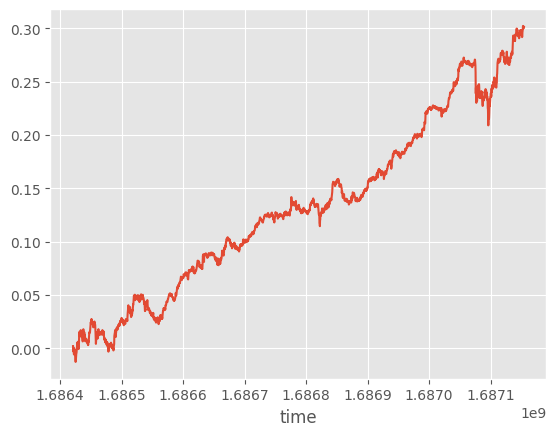

In [7]:
#Returns

# ****as per Ben - assuming a constant $1 position at the start of each time period 
#when in reality if position has been held for more than 1 time period there would be a compounding effect.

df['DOGE Return'] = df['DOGELOG1'] * df['DOGEPosition'].shift(1)
df['SHIB Return'] = df['SHIBLOG1'] * df['SHIBPosition'].shift(1)


df['Strategy Return'] = df['DOGE Return'] + df['SHIB Return']
#Plot the strategy returns
df['Strategy Return'].cumsum().plot()

In [21]:
df.tail(10)

,DOGEOPEN,DOGECLOSE,SHIBOPEN,SHIBCLOSE,DOGELOG1,SHIBLOG1,DOGELOG10,SHIBLOG10,DIF1,DIF10,DOGEPosition,SHIBPosition
time,,,,,,,,,,,,
1687151400,0.06206,0.06206,0.007199,0.007193,0.000000,-0.000695,0.001613,0.007536,0.000695,-0.005923,1,-1
1687151700,0.06206,0.06202,0.007192,0.007160,-0.000645,-0.004598,0.002583,0.004059,0.003954,-0.001475,1,-1
1687152000,0.06202,0.06207,0.007160,0.007157,0.000806,-0.000419,0.003389,0.000279,0.001225,0.003110,-1,1
1687152300,0.06208,0.06209,0.007158,0.007180,0.000322,0.003208,0.004358,0.008111,-0.002886,-0.003753,1,-1
1687152600,0.06208,0.06199,0.007181,0.007156,-0.001612,-0.003348,0.001938,0.002238,0.001736,-0.000301,1,-1
1687152900,0.06199,0.06204,0.007157,0.007180,0.000806,0.003348,0.001452,0.003628,-0.002542,-0.002176,1,-1
1687153200,0.06204,0.06204,0.007180,0.007170,0.000000,-0.001394,0.001129,0.001116,0.001394,0.000013,-1,1
1687153500,0.06205,0.06204,0.007171,0.007164,0.000000,-0.000837,0.000322,-0.002092,0.000837,0.002414,-1,1
1687153800,0.06204,0.06207,0.007164,0.007177,0.000483,0.001813,0.001451,0.001813,-0.001330,-0.000362,1,-1
